In [1]:
#these commands are regular python syntax used to import the necessary packages to be used within this notebook

import numpy as np
import pandas as pd

In [4]:
#the pandas function "read_excel" is a super critical one. It allows for reading of data from an excel doc into
#a dataframe to be used within python
#to do this, you will need to pass the function the filename of yor data, usually including the entire
#file address unless the file is stored within the same directory as this notebook

df = pd.read_excel('sucrose_pref_sample_data.xlsx')

In [5]:
#we have loaded the data in, and it is stored within the object 'df' as specified above
#to take a quick glance at it, we can just type df, or call the df.head() or df.tail() to see
#just a few of the top or bottom rows, respectively
#try putting different values within the parenthesis! what seems to be the default? (the # of rows when there 
# is no value placed in the parenthesis)

df.head()

,Mom,Diet,Animal ID,Sex,DOB,Unnamed: 5,Start,24 hr,Re-start,48 hr,Re-start.1,72 hr
0,824.0,LFD,963.0,M,2019-10-07,W Weight,71.406,70.58,71.64,70.827,72.210,71.88
1,NaN,NaN,NaN,NaN,NaT,W Volume,35.000,NaN,35.00,32.500,35.000,34.00
2,NaN,NaN,NaN,NaN,NaT,S Weight,71.855,66.59,72.51,67.600,73.376,67.78
3,NaN,NaN,NaN,NaN,NaT,S Volume,35.000,28.00,35.00,29.000,35.000,29.00
4,NaN,NaN,962.0,F,2019-10-07,W Weight,72.721,71.93,73.03,72.196,73.580,72.58


In [6]:
#we now want to start cleaning up our data so that we can effectively work with it
#as a start, we should probably get rid of all of those NaNs :(
#there are many different ways to do this using a variety of functions, and this really depends on your
#application. df.dropna is a good option a lot of the time, but in this case we would actually use a forward-fill
#which will fill values down the columns with the most recent entered value

df_cleaned = df.ffill(axis=0)

#the axis=0 i am specifying here is telling the ffill function to fill down the rows. 
#try changing the axis value to 1 and see what happens!

In [7]:
#on our new dataframe that we stored within the variable df_cleaned, we can yet again call .head() 
#to see what it now looks like!

df_cleaned.head()

,Mom,Diet,Animal ID,Sex,DOB,Unnamed: 5,Start,24 hr,Re-start,48 hr,Re-start.1,72 hr
0,824.0,LFD,963.0,M,2019-10-07,W Weight,71.406,70.58,71.64,70.827,72.210,71.88
1,824.0,LFD,963.0,M,2019-10-07,W Volume,35.000,70.58,35.00,32.500,35.000,34.00
2,824.0,LFD,963.0,M,2019-10-07,S Weight,71.855,66.59,72.51,67.600,73.376,67.78
3,824.0,LFD,963.0,M,2019-10-07,S Volume,35.000,28.00,35.00,29.000,35.000,29.00
4,824.0,LFD,962.0,F,2019-10-07,W Weight,72.721,71.93,73.03,72.196,73.580,72.58


In [8]:
#an example of indexing into dataframes. this is an extremely important skill to have, as it allows
#you to grab specific pieces of data out of the larger structure
#this is generally done, in most data types in python, using [].

df_cleaned['Sex'][7]

#in this case we are asking for column 'Sex' and the 8th value moving down that column
#to which it returns -> F
#try to find an index that will return 'M'

'F'

In [9]:
#it can be helpful to rename any columns in your dataframe to be as descriptive as possible
#in this case, the column we imported that contained the weight and volume information was unnamed, so we can
#use the df.rename function to give it a more appropriate title, which will help us to grab
#data from that column later on

df2 = df_cleaned.rename(columns = {'Unnamed: 5': 'Weights'})

#try to change the DOB column name to all lowercase, or spell it out!

In [10]:
#observing the new dataframe object we have just created, now with a correct 'Weights' column name

df2.head()

,Mom,Diet,Animal ID,Sex,DOB,Weights,Start,24 hr,Re-start,48 hr,Re-start.1,72 hr
0,824.0,LFD,963.0,M,2019-10-07,W Weight,71.406,70.58,71.64,70.827,72.210,71.88
1,824.0,LFD,963.0,M,2019-10-07,W Volume,35.000,70.58,35.00,32.500,35.000,34.00
2,824.0,LFD,963.0,M,2019-10-07,S Weight,71.855,66.59,72.51,67.600,73.376,67.78
3,824.0,LFD,963.0,M,2019-10-07,S Volume,35.000,28.00,35.00,29.000,35.000,29.00
4,824.0,LFD,962.0,F,2019-10-07,W Weight,72.721,71.93,73.03,72.196,73.580,72.58


In [11]:
#using print statements can be a very useful way to see what multiple operations in a cell are returning,
#and label each. Here, we are using the .shape function to get a good sense of the number of rows and columns
#that our dataframe contains

print('Number of rows: ', df2.shape[0])
print('Number of columns: ',df2.shape[1])

Number of rows:  48
Number of columns:  12


In [12]:
#here is where it gets interesting, our first for loop!!!
#when writing these types of operations, it is really helpful to first think about, or even write out
#what your goal is - what are you trying to do?

#here, I noticed that this specific dataset had rows that contained volume measurements, which will not be
#be relevant for our later analysis, so it would be best to remove all of those rows entirely upfront.
#to do this, I want to interate through every row of the dataframe, check whether the data at that index
#contains the str 'Volume', and if it does, I would like to remove that entire row using df2.drop(i)

for i in range(df2.shape[0]):
    if 'Volume' in df2['Weights'][i]:
        df2 = df2.drop(i)
        
df2.index = range(len(df2))

#afterwards, dropping rows can mess with the index (unique value identifier for each row), so I reset the index
#to more regular values

In [13]:
df2.head()

,Mom,Diet,Animal ID,Sex,DOB,Weights,Start,24 hr,Re-start,48 hr,Re-start.1,72 hr
0,824.0,LFD,963.0,M,2019-10-07,W Weight,71.406,70.580,71.640,70.827,72.210,71.880
1,824.0,LFD,963.0,M,2019-10-07,S Weight,71.855,66.590,72.510,67.600,73.376,67.780
2,824.0,LFD,962.0,F,2019-10-07,W Weight,72.721,71.930,73.030,72.196,73.580,72.580
3,824.0,LFD,962.0,F,2019-10-07,S Weight,71.313,66.380,72.185,68.310,72.372,70.194
4,824.0,LFD,964.0,F,2019-10-07,W Weight,71.993,71.248,72.279,71.630,73.200,72.830


In [14]:
#now it is time to perform some of the analysis on our data. to do this, we will want to iterate through every row
#and perform the same operation on that row (think of it like copying and pasting an equation down a row in excel)
#in this case, we want to first get the change in weight for both water and sucrose for every animal
#to do this is pretty simple, we will just subtract the values from the corresponding rows, and store those values
#within a newly created array! In this case, we have 3 timepoints, so we will have 3 arrays of consumption values


day1_con = np.zeros(df2.shape[0])
day2_con = np.zeros(df2.shape[0])
day3_con = np.zeros(df2.shape[0])

#for the first step here, we are 'initializing' our for loop, by creating the arrays that we will be using within
#the loop. As stated, we would like 3 separate arrays for the 3 different timepoints. All of them should be the
#same size as the # of rows in the dataframe. For now we are filling them with 0's as a placeholder

for i in range(df2.shape[0]):
    day1_con[i] = df2['Start'][i] - df2['24 hr'][i]
    day2_con[i] = df2['Re-start'][i] - df2['48 hr'][i]
    day3_con[i] = df2['Re-start.1'][i] - df2['72 hr'][i]
    
    
#for loop time! here, we are iterating through the entire range of the dataframe rows (which just means we are
#doing the given operation once for every row). The 'i' stores a value for every iteration. On the first time,
#it is a 1, and then a 2, and so on until we reach the end (48 rows). We are taking advantage of these numbers to
#index into the locations within the dataframe we're interested in, grab the data out of those locations,
#perform our subtraction operation, and return the resulting value into that row location within those
#new arrays we initialized
    
df2['day1_con'] = day1_con
df2['day2_con'] = day2_con
df2['day3_con'] = day3_con

#once the loop runs and we have 3 new arrays, we can simply add them to the end of our dataframe

In [15]:
#the df.columns function is a really simple and useful way to return an array with all column names
#now we see that our three added columns with the consumption values are included in this list!

df2.columns

Index(['Mom', 'Diet', 'Animal ID', 'Sex', 'DOB', 'Weights', 'Start', '24 hr',
       'Re-start', '48 hr', 'Re-start.1', '72 hr', 'day1_con', 'day2_con',
       'day3_con'],
      dtype='object')

In [16]:
animal_num = df2['Animal ID'].drop_duplicates('first')
animal_num.index = range(len(animal_num))


day1_sucrose_preference = np.zeros(np.shape(animal_num))
day2_sucrose_preference = np.zeros(np.shape(animal_num))
day3_sucrose_preference = np.zeros(np.shape(animal_num))

for i in range(len(animal_num)):
    sucrose_con = df2['day1_con'][(df2['Weights'] == 'S Weight') & (df2['Animal ID'] == animal_num[i])].values
    water_con = df2['day1_con'][(df2['Weights'] == 'W Weight') & (df2['Animal ID'] == animal_num[i])].values
    day1_sucrose_preference[i] = (sucrose_con/(sucrose_con+water_con))*100
    
    
    sucrose_con_2 = df2['day2_con'][(df2['Weights'] == 'S Weight') & (df2['Animal ID'] == animal_num[i])].values
    water_con_2 = df2['day2_con'][(df2['Weights'] == 'W Weight') & (df2['Animal ID'] == animal_num[i])].values
    day2_sucrose_preference[i] = (sucrose_con_2/(sucrose_con_2+water_con_2))*100
    
    sucrose_con_3 = df2['day3_con'][(df2['Weights'] == 'S Weight') & (df2['Animal ID'] == animal_num[i])].values
    water_con_3 = df2['day3_con'][(df2['Weights'] == 'W Weight') & (df2['Animal ID'] == animal_num[i])].values
    day3_sucrose_preference[i] = (sucrose_con_3/(sucrose_con_3+water_con_3))*100

In [17]:
#let's create one final dataframe containing all of our post-analysis information, and all relevant labels
#from here, we can export this as an excel or csv, or continue to analyze the group data within python, using
#scipy stats and/or visualize data using matplotlib or seaborn

preferences = pd.DataFrame({'animal_num': df2['Animal ID'], 'diet': df2['Diet']}).drop_duplicates()

preferences['day1_pref'] = day1_sucrose_preference 
preferences['day2_pref'] = day2_sucrose_preference
preferences['day3_pref'] = day3_sucrose_preference

In [18]:
#our final, cleaned dataframe containing all the important values for further analysis

preferences

,animal_num,diet,day1_pref,day2_pref,day3_pref
0,963.0,LFD,86.439008,85.794164,94.431320
2,962.0,LFD,86.180992,82.289233,68.533669
4,964.0,LFD,87.081672,85.946297,93.689238
6,967.0,LFD,84.892215,13.139535,90.248723
8,965.0,LFD,78.744770,88.718761,90.372834
10,966.0,LFD,83.520022,84.849407,91.824357
12,980.0,HFD,75.218750,40.317264,87.922705
14,981.0,HFD,79.076455,40.865039,87.277984
16,982.0,HFD,83.199763,86.029869,88.236915
18,983.0,HFD,17.122929,28.802589,90.414821


In [19]:
#Now that we have all of the data we are interested in within the same dataframe, 
#we can use the nifty groupby function from pandas to compare summary statistics between groups of interest!

grouped = preferences.groupby(['diet'])['day1_pref', 'day2_pref', 'day3_pref'].mean()

In [20]:
grouped

,day1_pref,day2_pref,day3_pref
diet,,,
HFD,67.563402,56.620360,87.588197
LFD,84.476447,73.456233,88.183357


## Let's plot this!!

In [21]:
import matplotlib.pyplot as plt

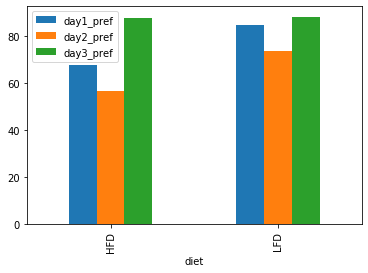

In [22]:
grouped.plot.bar();

In [23]:
from scipy.stats import ttest_ind

In [24]:
LFD_d1 = preferences['day1_pref'][preferences['diet'] == 'LFD']
HFD_d1 = preferences['day1_pref'][preferences['diet'] == 'HFD']

In [25]:
ttest_ind(LFD_d1, HFD_d1)

Ttest_indResult(statistic=1.4649087292298526, pvalue=0.1769854950118737)

## What is really nice about this type of data handling, is that while this may have taken a few hours of work upfront, almost all of the code can be reused for every subsequent data collection you perform. As long as the format is the same, you can import every other dataset and this program will automatically clean and analyze that data in the exact same way. Ensuring reproducibility and transparency!